In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics  import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB as bs
from sklearn.model_selection import cross_val_score as cvs


In [2]:
#loading the data set 
df=pd.read_csv("C:/Users/best/Downloads/heart.csv")

In [3]:
#seeing the top 5 values in the data set 
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#seeing the top tail values in the data set 
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
#seeing the shape of the data set 
df.shape

(918, 12)

there are 918 rows and 12 columns are present in the data set 


In [7]:
# seeing the size of the data set 
df.size

11016

In [8]:
#checking the data  types in the data set 
df.dtypes.value_counts()

int64      6
object     5
float64    1
dtype: int64

in the above data set there are 6 integer columns ,5 object columns 1 float columns 

In [9]:
#seeing the info of the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
#checking the  null values in the data set 
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

as you can see there are no null values in the data set 


In [11]:
#describing the data 
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
#seeing the column of the data set 
df.columns 

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# performing eda on the data set 


In [13]:
#now iam going to separate the categorical and numerical values 
cat=df.select_dtypes(exclude=np.number)

In [14]:
num=df.select_dtypes(include=np.number)

In [15]:
#seeing the head values of the categorical and numerical data 
cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [16]:
num.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


C:\Users\best\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

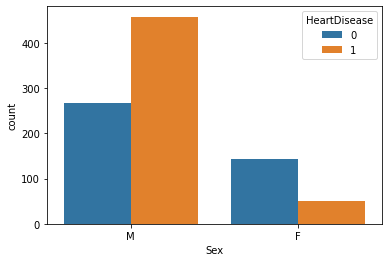

In [17]:
#now its time to plot sum graphs to analyze data 
sns.countplot(cat["Sex"],hue=num["HeartDisease"])

from the above data we can say that most of the males are affected the heart diseases


In [18]:
#now we will analyze male data and female data separately
df.groupby(df["Sex"]).mean()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Sex,,,,,,,
F,52.492228,132.212435,241.196891,0.134715,146.139896,0.668912,0.259067
M,53.782069,132.445517,187.513103,0.259310,134.325517,0.945517,0.631724


from the above we can say that average age for getting heart disease for both male and female are similar 
fasting blood sugar was high when compared to female 


In [19]:
df.groupby(df["Sex"]).median()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Sex,,,,,,,
F,53.0,130.0,243.0,0.0,150.0,0.0,0.0
M,55.0,130.0,219.0,0.0,134.0,0.8,1.0


C:\Users\best\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

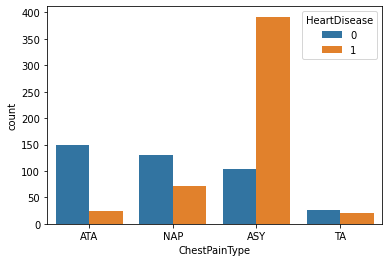

In [20]:
#now comparing the Heart Disease with other features 
sns.countplot(df["ChestPainType"],hue=df["HeartDisease"])

from the above graph we acn say that asy chest pain type are affecting more for heart diseases

C:\Users\best\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

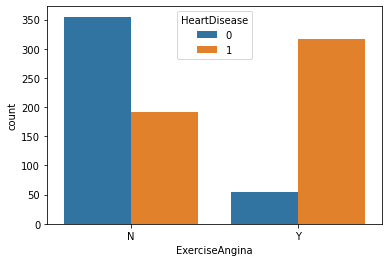

In [21]:
sns.countplot(df["ExerciseAngina"],hue=df["HeartDisease"])

the above feature exerciseagina means the heart strokes that happend because of the exercises for female it was high when cimpared to male 

C:\Users\best\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

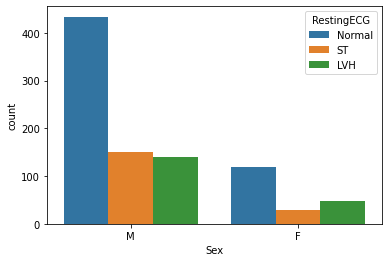

In [22]:
#now we will see the restingecg it is used to predict the electrical activity of heart 
#whether the person have heart strock or not and it finds rhythm of the heart 
sns.countplot(df["Sex"],hue=df["RestingECG"])

in the above graph we can see the resting ecg values in the data set for both males and females 


<AxesSubplot:xlabel='Sex', ylabel='Cholesterol'>

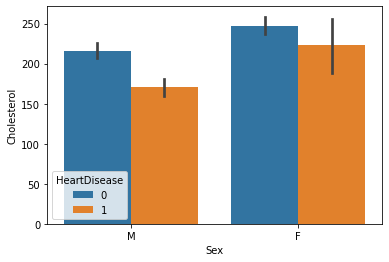

In [23]:
#now we will see some barplots for more understanding of data
sns.barplot(x='Sex',y="Cholesterol",hue="HeartDisease",data=df)

<AxesSubplot:xlabel='Sex', ylabel='MaxHR'>

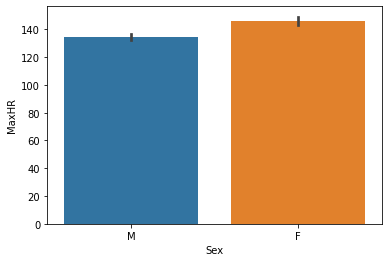

In [24]:
sns.barplot(x="Sex",y="MaxHR",data=df)

maximum heart rate is more for females when compared to males 

<AxesSubplot:xlabel='Sex', ylabel='RestingBP'>

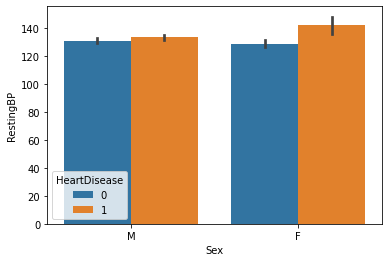

In [25]:
sns.barplot(x="Sex",y="RestingBP",data=df,hue="HeartDisease")

<AxesSubplot:xlabel='Sex', ylabel='Age'>

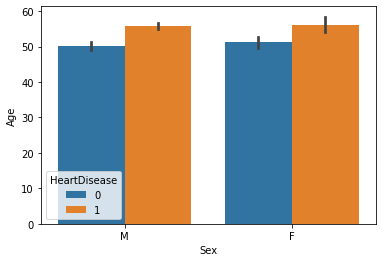

In [26]:
sns.barplot(x="Sex",y="Age",data=df,hue="HeartDisease")

people affected by the heart disease are above the 50 age 

<AxesSubplot:>

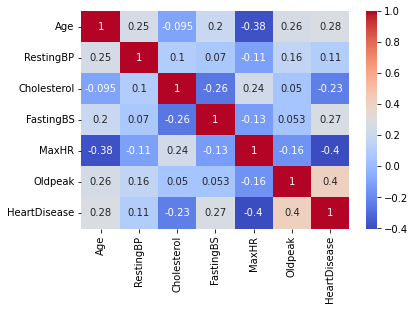

In [27]:
#now we will the correlation matrix in order to get the relation
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

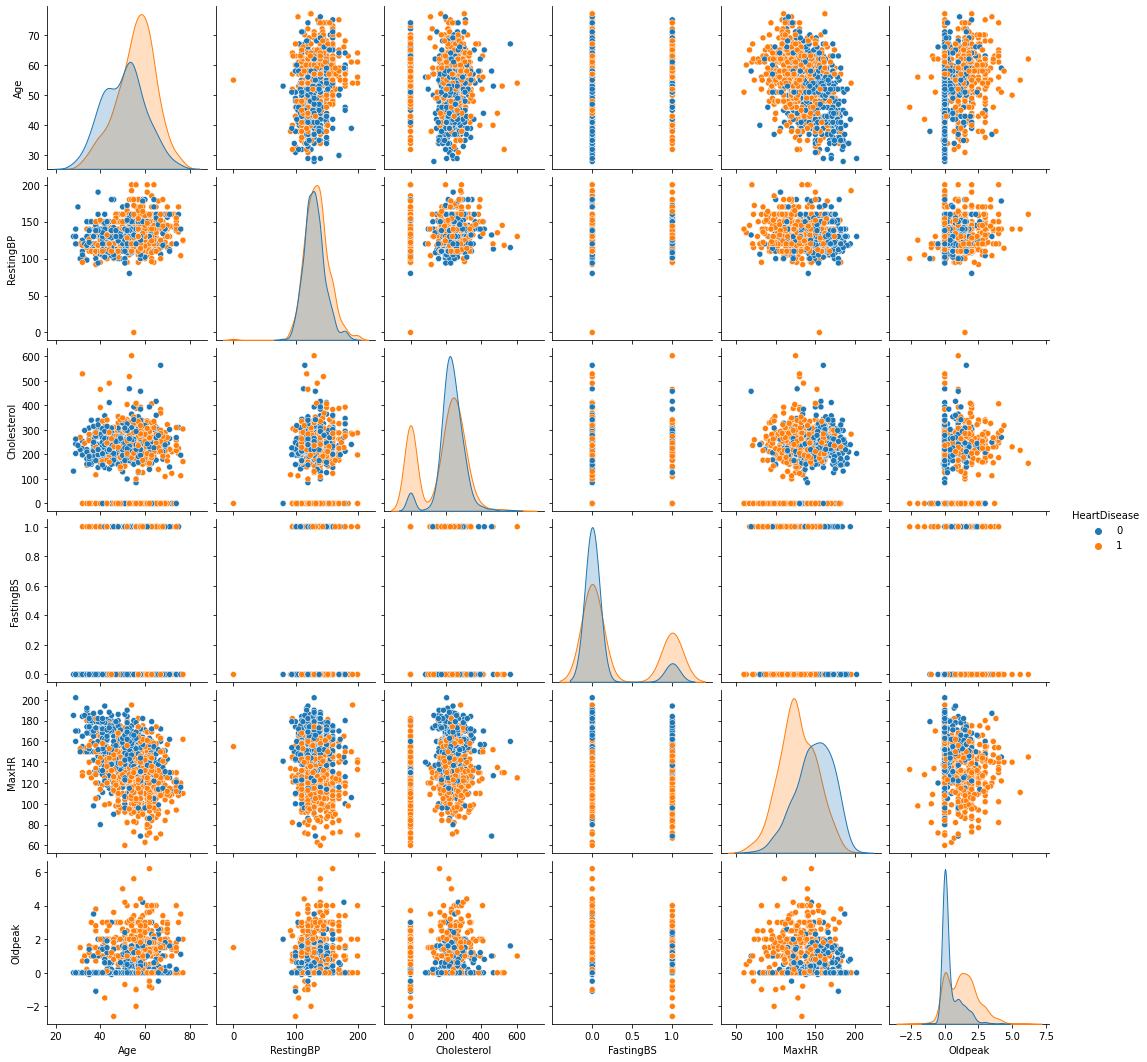

In [28]:
#from the above we can say that mostly 
sns.pairplot(df,hue="HeartDisease")

from the above we can see the distribution of the both heartdisease having and not having people

C:\Users\best\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FastingBS', ylabel='Density'>

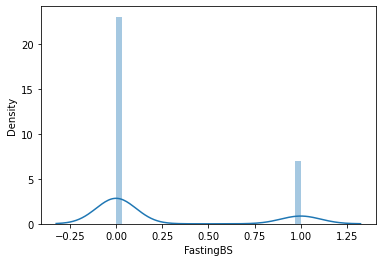

In [29]:
sns.distplot(df["FastingBS"])

In [30]:
num.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


C:\Users\best\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

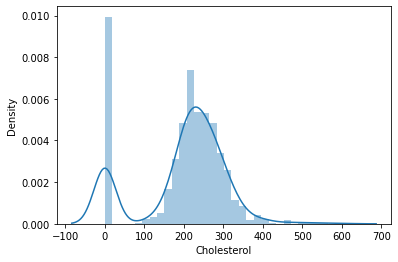

In [31]:
sns.distplot(df["Cholesterol"])

C:\Users\best\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxHR', ylabel='Density'>

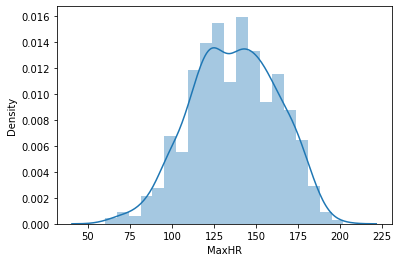

In [32]:
sns.distplot(df["MaxHR"])

C:\Users\best\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

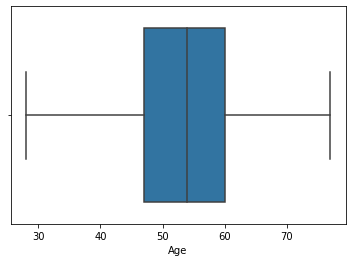

In [33]:
#now it time to detect outliers in the data set 
sns.boxplot(df["Age"],hue=df["HeartDisease"])

there are no outliers in the age

C:\Users\best\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RestingBP'>

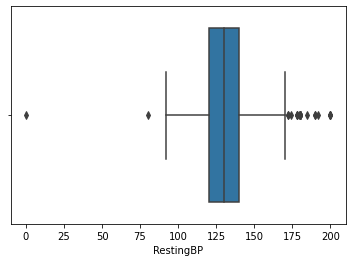

In [34]:
sns.boxplot(df["RestingBP"])

C:\Users\best\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaxHR'>

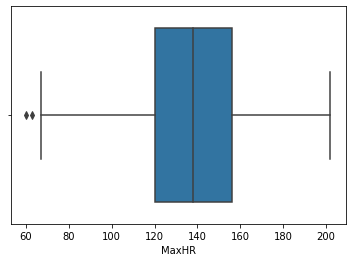

In [35]:
sns.boxplot(df["MaxHR"])

C:\Users\best\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cholesterol'>

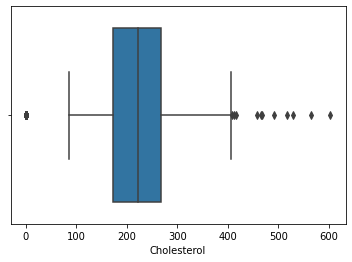

In [36]:
sns.boxplot(df["Cholesterol"])

In [37]:
#now we will remove the outliers in the data set using the zscore method
from scipy import stats
data=df[(np.abs(stats.zscore(num))<3).all(axis=1)]

In [38]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [39]:
#we removed outliers from the data set 
data.shape

(899, 12)

In [40]:
#now its time to transform catogorical data into numerical data 
sub=pd.get_dummies(cat,drop_first=True)

In [41]:
sub.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,1,1,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,1,0
2,1,1,0,0,0,1,0,0,1
3,0,0,0,0,1,0,1,1,0
4,1,0,1,0,1,0,0,0,1


In [42]:
data.drop(cat,axis=1,inplace=True)

C:\Users\best\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
#now we will concatenate our transformed data with the numerical data
df1=pd.concat([sub,data],axis=1)

In [44]:
#now we need to remove the null values 
df1.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,0,0,1,0,0,0,1,40.0,140.0,289.0,0.0,172.0,0.0,0.0
1,0,0,1,0,1,0,0,1,0,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,1,1,0,0,0,1,0,0,1,37.0,130.0,283.0,0.0,98.0,0.0,0.0
3,0,0,0,0,1,0,1,1,0,48.0,138.0,214.0,0.0,108.0,1.5,1.0
4,1,0,1,0,1,0,0,0,1,54.0,150.0,195.0,0.0,122.0,0.0,0.0


In [45]:
df1.isna().sum()

Sex_M                 0
ChestPainType_ATA     0
ChestPainType_NAP     0
ChestPainType_TA      0
RestingECG_Normal     0
RestingECG_ST         0
ExerciseAngina_Y      0
ST_Slope_Flat         0
ST_Slope_Up           0
Age                  19
RestingBP            19
Cholesterol          19
FastingBS            19
MaxHR                19
Oldpeak              19
HeartDisease         19
dtype: int64

In [46]:
df1=df1.dropna()

In [47]:
df1.shape

(899, 16)

scaling down features

In [49]:
#dividing of independent and dependent variables 
x=StandardScaler().fit_transform(df1.drop("HeartDisease",axis=1))
y=df1["HeartDisease"]

In [50]:
d=pd.DataFrame(x)

In [51]:
#these are scale down features
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.515943,2.063325,-0.534905,-0.22955,0.809702,-0.489898,-0.822945,-0.998888,1.134695,-1.428154,0.465900,0.849636,-0.550362,1.384320,-0.855469
1,-1.938199,-0.484655,1.869492,-0.22955,0.809702,-0.489898,-0.822945,1.001113,-0.881294,-0.475855,1.634714,-0.168122,-0.550362,0.752973,0.137516
2,0.515943,2.063325,-0.534905,-0.22955,-1.235023,2.041241,-0.822945,-0.998888,1.134695,-1.745588,-0.118507,0.793612,-0.550362,-1.535661,-0.855469
3,-1.938199,-0.484655,-0.534905,-0.22955,0.809702,-0.489898,1.215148,1.001113,-0.881294,-0.581666,0.349019,0.149344,-0.550362,-1.141069,0.634008
4,0.515943,-0.484655,1.869492,-0.22955,0.809702,-0.489898,-0.822945,-0.998888,1.134695,0.053200,1.050307,-0.028064,-0.550362,-0.588640,-0.855469


# modelling

In [79]:
#now its time for spliting of data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [80]:
#now viewing the shapes of trainning and testing data 
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((629, 15), (629,), (270, 15), (270,))

there are 629 values for training and 270 values for testing 

In [56]:
model=dtc()

In [57]:
#fitting the model
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
pre=model.predict(x_test)

In [59]:
pre

array([1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0.

In [60]:
accuracy_score(pre,y_test)

0.762962962962963

<AxesSubplot:>

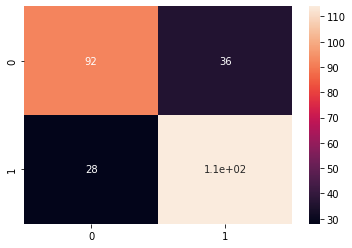

In [63]:
sns.heatmap(cm(pre,y_test),annot=True)

In [64]:
print(cr(pre,y_test))

              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74       128
         1.0       0.76      0.80      0.78       142

    accuracy                           0.76       270
   macro avg       0.76      0.76      0.76       270
weighted avg       0.76      0.76      0.76       270



accuracy of our model is 77 percent 

In [65]:
#now Random ForestClassifier 
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(max_depth=4, random_state=0)

In [66]:
m.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [67]:
predict=m.predict(x_test)

In [68]:
accuracy_score(predict,y_test)

0.8851851851851852

<AxesSubplot:>

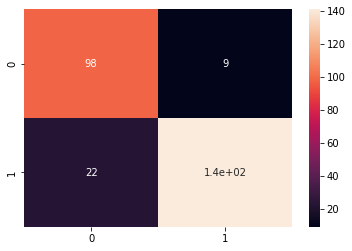

In [69]:
sns.heatmap(cm(predict,y_test),annot=True)

In [70]:
print(cr(predict,y_test))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.86       107
         1.0       0.94      0.87      0.90       163

    accuracy                           0.89       270
   macro avg       0.88      0.89      0.88       270
weighted avg       0.89      0.89      0.89       270



In [84]:
bayes=bs()


In [85]:
bayes.fit(x_train,y_train)


GaussianNB()

In [86]:
p=bayes.predict(x_test)

In [87]:
p

array([1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0.

In [88]:
accuracy_score(p,y_test)

0.8629629629629629

<AxesSubplot:>

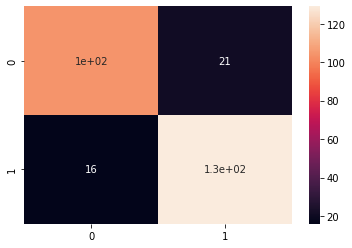

In [89]:
sns.heatmap(cm(p,y_test),annot=True)

In [90]:
print(cr(p,y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       125
         1.0       0.86      0.89      0.87       145

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270

